In [109]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [92]:
class DecisionTree:
    def __init__(self, depth=1, max_depth=2):
        self.feature = None
        self.threshold = None
        self.left_value = None
        self.right_value = None
        self.x_left = None
        self.x_right = None
        self.left_y = None
        self.right_y = None
        self.left_tree = None
        self.right_tree = None
        self.max_depth = max_depth
        self.depth = depth

    def fit(self, x, y):
        best_gain = -1
        feature_index = range(x.shape[1])
        for feature_index in feature_index:
            threshold = np.unique(x[:, feature_index])
            for threshold in threshold:
                left_x = x[:, feature_index] <= threshold
                right_x = ~left_x
                left_y, right_y = y[left_x], y[right_x]
                if len(left_y) > 0 and len(right_y) > 0:
                    left_weight = len(left_y) / len(y)
                    right_weight = len(right_y) / len(y)
                    gain = self.entropy(y) - (left_weight * self.entropy(left_y) + right_weight * self.entropy(right_y))
                    if gain > best_gain:
                        best_gain = gain
                        self.feature = feature_index
                        self.threshold = threshold
                        self.x_left = x[left_x]
                        self.x_right = x[right_x]
                        self.right_y = right_y
                        self.left_y = left_y

        if self.depth == self.max_depth or self.feature is None:
            if self.left_y is not None and len(self.left_y) > 0:
                self.left_value = np.bincount(self.left_y).argmax()
            if self.right_y is not None and len(self.right_y) > 0:
                self.right_value = np.bincount(self.right_y).argmax()
        elif self.depth < self.max_depth:
            self.left_tree = DecisionTree(depth=self.depth + 1, max_depth=self.max_depth)
            self.left_tree.fit(self.x_left, self.left_y)
            self.right_tree = DecisionTree(depth=self.depth + 1, max_depth=self.max_depth)
            self.right_tree.fit(self.x_right, self.right_y)

    def predict(self, x):
        thre = x[:, self.feature] <= self.threshold
        predictions = np.empty(x.shape[0], dtype=int)

        if self.left_tree and len(thre) > 0:
            predictions[thre] = self.left_tree.predict(x[thre])
        elif self.left_tree is None and len(thre) > 0:
            predictions[thre] = self.left_value

        if self.right_tree and len(~thre) > 0:
            predictions[~thre] = self.right_tree.predict(x[~thre])
        elif self.right_tree is None and len(~thre) > 0:
            predictions[~thre] = self.right_value

        return predictions

    def entropy(self, x):
        proportions = np.bincount(x) / len(x)
        return -np.sum([p * np.log2(p) for p in proportions if p > 0])



In [110]:
iris = load_iris()
data, target = iris.data, iris.target

In [111]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)
print(f"Shape of X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}, y_test: {y_test.shape}")

Shape of X_train: (120, 4), y_train: (120,)
Shape of X_test: (30, 4), y_test: (30,)


In [108]:
tree = DecisionTree(max_depth=2)
tree.fit(X_train, y_train)

predictions = tree.predict(X_test)
print(predictions)
print(f"Decision Tree Accuracy: {accuracy_score(y_test, predictions):.3f}")
print(f"Decision Tree F1-Score: {f1_score(y_test, predictions, average='weighted'):.3f}")

[1 0 2 1 2 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
Decision Tree Accuracy: 0.967
Decision Tree F1-Score: 0.966


In [112]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=2)
tree.fit(X_train, y_train)
predictions = tree.predict(X_test)
print(predictions)
print(f"Sklearn DT Accuracy: {accuracy_score(y_test, predictions):.3f}")
print(f"Sklearn DT F1-Score: {f1_score(y_test, predictions, average='weighted'):.3f}")

[1 0 2 1 2 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
Sklearn DT Accuracy: 0.967
Sklearn DT F1-Score: 0.966


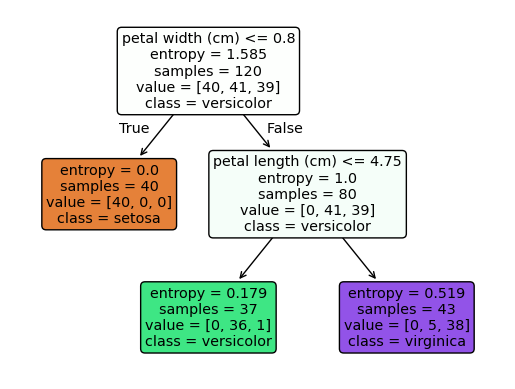

In [116]:
plot_tree(tree, feature_names=iris.feature_names, class_names=iris.target_names, filled=True, rounded=True)
plt.show()